<a href="https://colab.research.google.com/github/DickLiu/Python_Note/blob/master/triple_barrier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

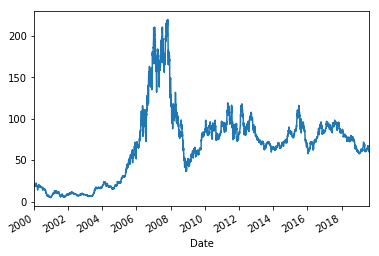

In [0]:
import datetime
import pandas as pd
import requests

%matplotlib inline

def crawl_price(stock_id):
    now = int(datetime.datetime.now().timestamp())+86400
    url = "https://query1.finance.yahoo.com/v7/finance/download/" + stock_id + "?period1=0&period2=" + str(now) + "&interval=1d&events=history&crumb=hP2rOschxO0"
    response = requests.post(url)

    with open('file.csv', 'w') as f:
        f.writelines(response.text)

    df = pd.read_csv('file.csv', index_col='Date', parse_dates=['Date'])

    return df

df = crawl_price("2354.TW")
df.Close.plot()



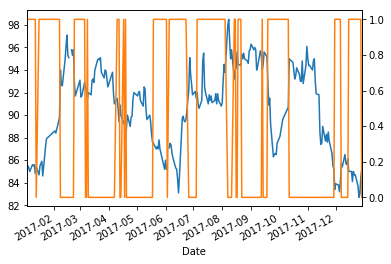

In [0]:
date = '2017'
df.Close[date].plot()
(df.Close.shift(-20) / df.Close > 1).astype(int)[date].plot(secondary_y=True)

In [0]:
import numpy as np
import math
def triple_barrier(price, ub, lb, max_period):

    def end_price(s):
        return np.append(s[(s / s[0] > ub) | (s / s[0] < lb)], s[-1])[0]/s[0]
    
    r = np.array(range(max_period))
    
    def end_time(s):
        return np.append(r[(s / s[0] > ub) | (s / s[0] < lb)], max_period-1)[0]

    p = price.rolling(max_period).apply(end_price, raw=True).shift(-max_period+1)
    t = price.rolling(max_period).apply(end_time, raw=True).shift(-max_period+1)
    t = pd.Series([t.index[int(k+i)] if not math.isnan(k+i) else np.datetime64('NaT') 
                   for i, k in enumerate(t)], index=t.index).dropna()

    signal = pd.Series(0, p.index)
    signal.loc[p > ub] = 1
    signal.loc[p < lb] = -1
    ret = pd.DataFrame({'triple_barrier_profit':p, 'triple_barrier_sell_time':t, 'triple_barrier_signal':signal})

    return ret

ret = triple_barrier(df.Close, 1.07, 0.97, 20)
ret.head()

,triple_barrier_profit,triple_barrier_sell_time,triple_barrier_signal
Date,,,
2000-01-04,0.966683,2000-01-07,-1
2000-01-05,0.961296,2000-01-07,-1
2000-01-06,0.966114,2000-01-11,-1
2000-01-07,0.942503,2000-01-14,-1
2000-01-10,0.942503,2000-01-14,-1


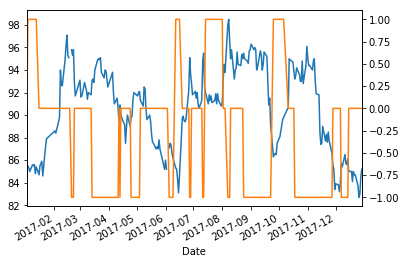

In [0]:
date = '2017'
df.Close[date].plot()
ret.triple_barrier_signal[date].plot(secondary_y=True)

## 假如您覺得這個範例有幫助到您，也希望您可以支持一下，絕對是物超所值的課程：
## （不推薦新手學習，想挑戰的可以試試看）
## [FinLab Machine Learning 線上影音課程](https://hahow.in/cr/finlab-ml)
## 比較適合新手的入門課程：
## [FinLab 小資族選股策略 線上影音課程](https://hahow.in/cr/python-finance)